# **Installing Competition Dataset and Kaggle into notebook**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"noahwelsh","key":"50b8e1afe09c9711e677935687313320"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/psycon/daily-gold-price-historical-data                               Daily Gold Price Historical Data                  66KB  2022-04-22 23:57:28            560         21  1.0              
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            259        318  0.9375           
datasets/piterfm/2022-ukraine-russian-war                                      2022 Ukraine Russia War                            2KB  2022-04-22 09:03:42          10775        591  1.0              


In [ ]:
!kaggle competitions download -c store-sales-time-series-forecasting

 42% 9.00M/21.4M [00:00<00:00, 48.4MB/s]
100% 21.4M/21.4M [00:00<00:00, 88.9MB/s]


In [ ]:
!unzip store-sales-time-series-forecasting.zip

Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


# **Displaying all provided data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

train_data = pd.read_csv('train.csv',parse_dates=['date'],infer_datetime_format=True)
#train_data['date'] = train_data.date.dt.to_period('D')

test_data = pd.read_csv('test.csv',parse_dates=['date'],infer_datetime_format=True)

oil_data = pd.read_csv('oil.csv',parse_dates=['date'],infer_datetime_format=True)

holiday_data = pd.read_csv('holidays_events.csv',parse_dates=['date'],infer_datetime_format=True)
#holiday_data['date'] = holiday_data.date.dt.to_period('D')

transaction_data = pd.read_csv('transactions.csv',parse_dates=['date'],infer_datetime_format=True,index_col='date')
#transaction_data['date'] = transaction_data.date.dt.to_period('D')

In [ ]:
store_sales = train_data.set_index(['store_nbr','family','date'])
store_sales.tail()

id     sales  \
store_nbr family                     date                            
9         POULTRY                    2017-08-15  3000883   438.133   
          PREPARED FOODS             2017-08-15  3000884   154.553   
          PRODUCE                    2017-08-15  3000885  2419.729   
          SCHOOL AND OFFICE SUPPLIES 2017-08-15  3000886   121.000   
          SEAFOOD                    2017-08-15  3000887    16.000   

                                                 onpromotion  
store_nbr family                     date                     
9         POULTRY                    2017-08-15            0  
          PREPARED FOODS             2017-08-15            1  
          PRODUCE                    2017-08-15          148  
          SCHOOL AND OFFICE SUPPLIES 2017-08-15            8  
          SEAFOOD                    2017-08-15            0

In [ ]:
avg_sales = store_sales.groupby('date')['sales'].mean().to_frame()

In [ ]:
avg_prom = store_sales.groupby('date')['onpromotion'].mean().to_frame()

In [ ]:
oil_data.set_index('date', inplace=True)
oil_data = oil_data.resample('D').mean().fillna(method='ffill')

In [ ]:
oil_data

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-05,93.12
...,...
2017-08-27,47.65
2017-08-28,46.40
2017-08-29,46.46


In [ ]:
transaction_data

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
...,...,...
2017-08-15,50,2804
2017-08-15,51,1573
2017-08-15,52,2255


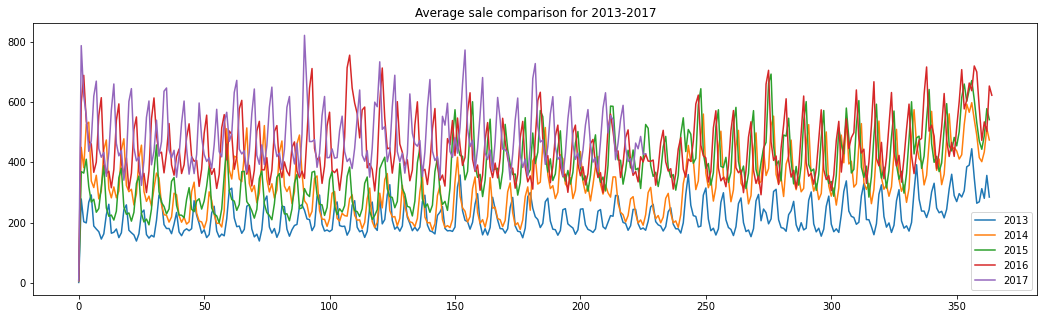

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(avg_sales.loc['2013'].values, label='2013')
plt.plot(avg_sales.loc['2014'].values, label='2014')
plt.plot(avg_sales.loc['2015'].values, label='2015')
plt.plot(avg_sales.loc['2016'].values, label='2016')
plt.plot(avg_sales.loc['2017'].values, label ='2017')
plt.legend()
plt.title("Average sale comparison for 2013-2017")
plt.show()

In [ ]:
avg_sales['dow'] = avg_sales.index.weekday.to_list()

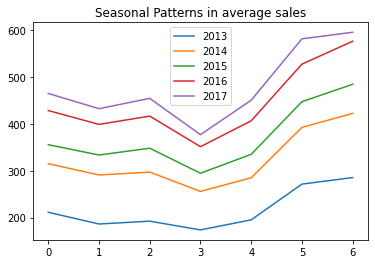

In [ ]:
fig = plt.figure()
for i in ['2013','2014','2015','2016','2017']:
    plt.plot(avg_sales.loc[i].groupby('dow').mean(), label=i)
plt.legend()
plt.title("Seasonal Patterns in average sales")
plt.show()

In [ ]:
holiday_data.set_index('date',inplace=True)

In [ ]:
holiday_data

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False


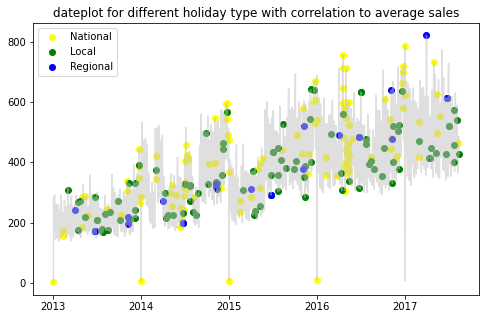

In [ ]:
#slice only holiday in the training data onwards

hol = holiday_data.loc[holiday_data.index.isin(avg_sales.index)]
hol_nat = hol.loc[(hol['locale']=='National') & 
                  (hol['transferred']!=True) & 
                  (hol['type']!='Work Day')]
hol_local = hol.loc[(hol['locale']=='Local') & 
                  (hol['transferred']!=True) & 
                  (hol['type']!='Work Day')]
hol_reg = hol.loc[(hol['locale']=='Regional') & 
                  (hol['transferred']!=True) & 
                  (hol['type']!='Work Day')]

fig = plt.figure(figsize=(8,5))
#plt.plot_date(hol.index,avg_sales.sales.loc[hol.index],color='red')
plt.plot_date(hol_nat.index,avg_sales.sales.loc[(hol_nat.index)],color='yellow',label='National')
plt.plot_date(hol_local.index,avg_sales.sales.loc[(hol_local.index)],color='green',label = 'Local')
plt.plot_date(hol_reg.index,avg_sales.sales.loc[(hol_reg.index)],color='blue',label = 'Regional')
plt.legend()
plt.plot(avg_sales['sales'],alpha=0.5,color='silver')
plt.title("dateplot for different holiday type with correlation to average sales")
plt.show()

In [ ]:
test_data.set_index('date',inplace=True)

In [ ]:
#slice only holiday in the test data onwards

hol_test = holiday_data.loc[holiday_data.index.isin(test_data.index)]
hol_test

,type,locale,locale_name,description,transferred
date,,,,,
2017-08-24,Holiday,Local,Ambato,Fundacion de Ambato,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def mm_scale_column(df,colname):
    mm_scaler = MinMaxScaler()
    mm_scaler.fit(df[colname].values.reshape(-1,1))
    df['{}_scaled'.format(colname)] = mm_scaler.transform(df[colname].values.reshape(-1,1))
    return df

In [ ]:
oil_data.rename({'dcoilwtico':'oil_price'},axis=1,inplace=True)

In [ ]:
oil_data['price_chg'] = oil_data['oil_price']-oil_data['oil_price'].shift(1)

In [ ]:
oil_data.dropna(inplace=True)

In [ ]:
mm_scale_column(transaction_data,'transactions')
mm_scale_column(oil_data,'oil_price')
mm_scale_column(oil_data,'price_chg')
mm_scale_column(avg_prom,'onpromotion')
mm_scale_column(avg_sales,'sales')

,sales,dow,sales_scaled
date,,,
2013-01-01,1.409438,1,0.000000
2013-01-02,278.390807,2,0.337937
2013-01-03,202.840197,3,0.245760
2013-01-04,198.911154,4,0.240966
2013-01-05,267.873244,5,0.325104
...,...,...,...
2017-08-11,463.733851,4,0.564068
2017-08-12,444.798280,5,0.540965
2017-08-13,485.768618,6,0.590952


correlation = transactions_scaled    0.092478
dtype: float64


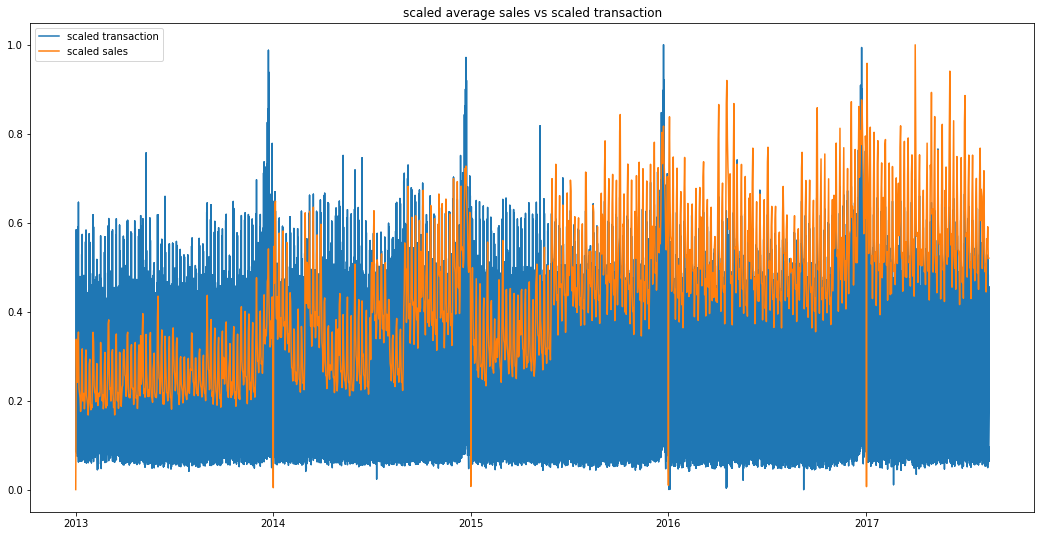

In [ ]:
corr = transaction_data['transactions_scaled'].to_frame().corrwith(avg_sales['sales_scaled'])
print('correlation = {}'.format(corr))

fig = plt.figure(figsize=(18,9))
plt.title('scaled average sales vs scaled transaction')
plt.plot(transaction_data['transactions_scaled'],label='scaled transaction')
plt.plot(avg_sales['sales_scaled'],label='scaled sales')
plt.legend()
plt.show()

correlation = onpromotion_scaled    0.574943
dtype: float64


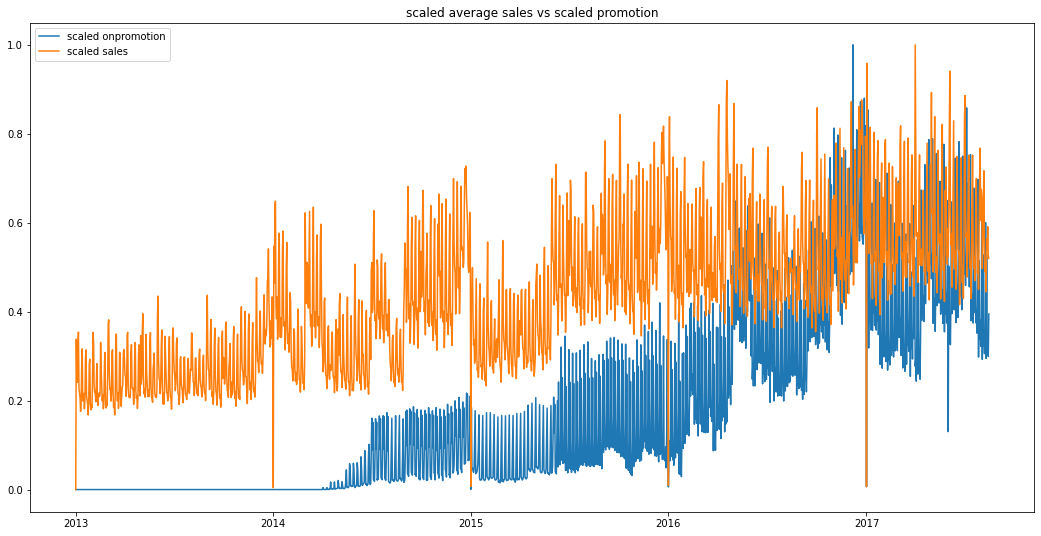

In [ ]:
corr = avg_prom['onpromotion_scaled'].to_frame().corrwith(avg_sales['sales_scaled'])
print('correlation = {}'.format(corr))

fig = plt.figure(figsize=(18,9))
plt.title('scaled average sales vs scaled promotion')
plt.plot(avg_prom['onpromotion_scaled'],label='scaled onpromotion')
plt.plot(avg_sales['sales_scaled'],label='scaled sales')
plt.legend()
plt.show()

correlation = oil_price_scaled   -0.62675
dtype: float64


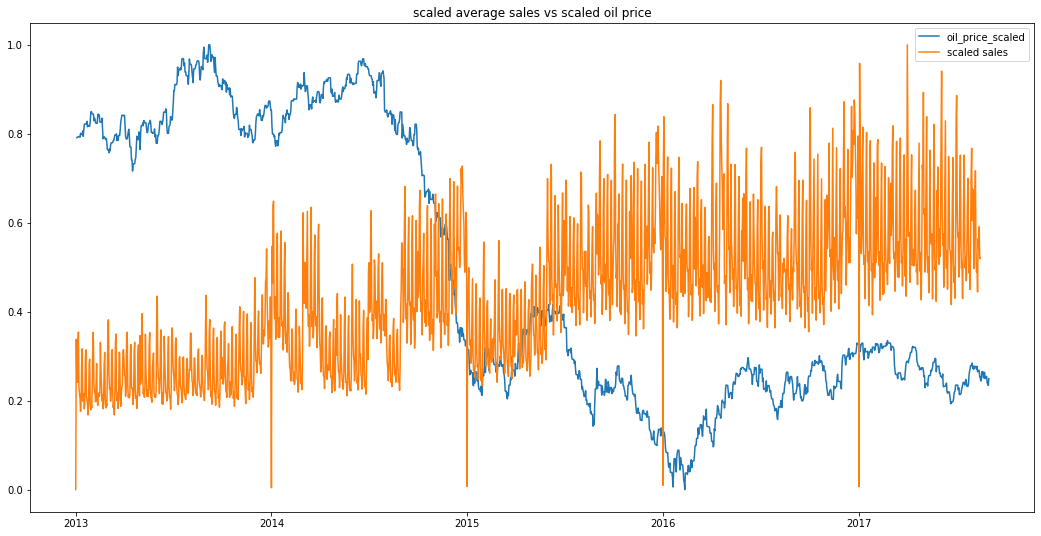

In [ ]:
corr = oil_data['oil_price_scaled'].to_frame().corrwith(avg_sales['sales_scaled'])
print('correlation = {}'.format(corr))

fig = plt.figure(figsize=(18,9))
plt.title('scaled average sales vs scaled oil price')
plt.plot(oil_data['oil_price_scaled'],label='oil_price_scaled')
plt.plot(avg_sales['sales_scaled'],label='scaled sales')
plt.legend()
plt.show()

correlation = price_chg_scaled   -0.022777
dtype: float64


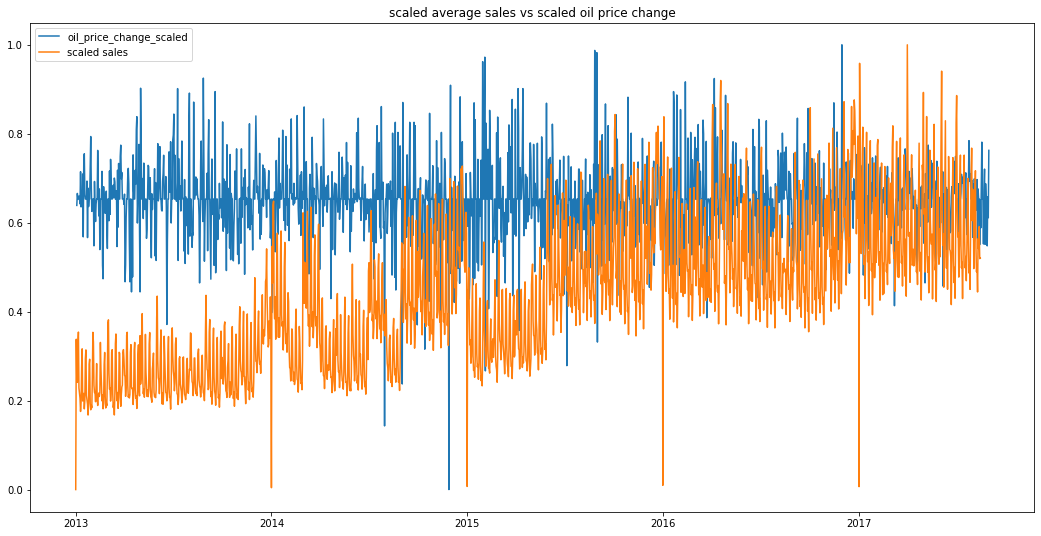

In [ ]:
corr = oil_data['price_chg_scaled'].to_frame().corrwith(avg_sales['sales_scaled'])
print('correlation = {}'.format(corr))

fig = plt.figure(figsize=(18,9))
plt.title('scaled average sales vs scaled oil price change')
plt.plot(oil_data['price_chg_scaled'],label='oil_price_change_scaled')
plt.plot(avg_sales['sales_scaled'],label='scaled sales')
plt.legend()
plt.show()


# JAX IMPLEMENTATION FOR LINEAR REGRESSION AND GRADIENT DESCENT ON  DATA

# Linear Regression Code

Note that gray represents predictions and red represents actual values.


## Sales and Dates Code

In [ ]:
transaction = pd.read_csv('./transactions.csv', parse_dates=['date'])
transaction = transaction.set_index('date').to_period('d')
transaction.tail()

,store_nbr,transactions
date,,
2017-08-15,50,2804
2017-08-15,51,1573
2017-08-15,52,2255
2017-08-15,53,932
2017-08-15,54,802


transactions    0.835026
dtype: float64

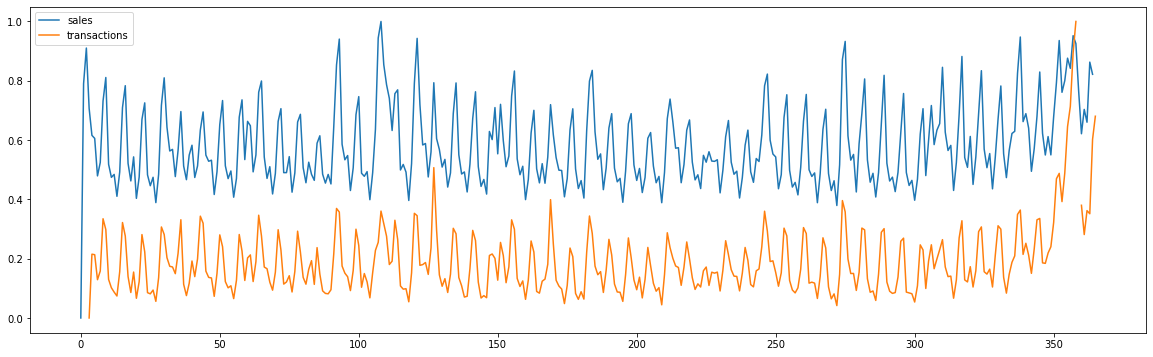

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, cross_validate

scale = MinMaxScaler()
df_train = pd.read_csv('./train.csv', parse_dates=['date'], infer_datetime_format=True)
df_train['date'] = df_train.date.dt.to_period('D')
store_sales = df_train.set_index(['store_nbr', 'family', 'date']).sort_index()
prom = (store_sales.groupby('date').mean().squeeze())['onpromotion'].to_frame()
average_sales = (store_sales.groupby('date').mean().squeeze())['sales'].to_frame()
sales_plot = average_sales.copy()
trans = transaction.resample('d').mean()['transactions'].to_frame()
plt.figure(figsize=(20,6))
plt.plot(scale.fit_transform(sales_plot.loc['2016'].values), label='sales')
plt.plot(scale.fit_transform(trans.loc['2016'].values), label='transactions')
plt.legend();
trans.loc['2016'].corrwith(sales_plot.loc['2016'].sales)

In [ ]:
def model_cv (X, y):
    cv = TimeSeriesSplit()
    model = LinearRegression()
    result = cross_validate(model, X.loc[:'2017-07'],y.loc[:'2017-07'], cv=cv,scoring=["neg_mean_absolute_error", "neg_mean_squared_log_error"], return_estimator=True)
    mae = -result["test_neg_mean_absolute_error"]
    rmsle = np.sqrt(- result["test_neg_mean_squared_log_error"])
    print('mae = {:.3f}\nrmsle = {:.3f}'.format(mae.mean(), rmsle.mean()))
    X_plt = X.loc['2017-08']
    y_plt = y.loc['2017-08']
    plt.figure(figsize=(20,15))
    for i in result['estimator']:
        y_pred = pd.DataFrame(i.predict(X_plt), index=X_plt.index, columns=['sales'])
        y_pred.plot(color='red')
        y_plt.plot(color='silver')

In [ ]:
def X_y(df):
    df = df.copy()
    X = df.loc['2017':].dropna().drop(columns=['sales'])
    y = df.loc['2017':]['sales'].dropna()
    return X,y

In [ ]:
def creat_time_features(df):
    """
    Creates time series features from datetime index
    """
    df = df.copy()
    #df['trend'] = np.arange(len(df.index))
    #df['trend^2'] = (np.arange(len(df.index)) +1) ** 2
    #df['trend^3'] = (np.arange(len(df.index)) +1) ** 3
    #df['trend^4'] = (np.arange(len(df.index)) +1) ** 4
    #df['trend^5'] = (np.arange(len(df.index)) +1) ** 5
    #df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df.index.day_of_week
    df['weekofyear'] = df.index.week
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    #df['year'] = df.index.year
    df['dayofyear'] = df.index.day_of_year
    #df['dayofmonth'] = df.index.day
    X = df.copy()
    return X

In [ ]:
df_test = pd.read_csv('./test.csv', parse_dates=['date'])
df_test['date'] = df_test.date.dt.to_period('D')
df_test.head()
X_train = df_train.copy()
X_test = df_test.copy()
full_df = pd.concat([X_train, X_test])
full_df.reset_index(drop=True, inplace=True)
X_store = full_df.set_index(['store_nbr', 'family', 'date']).sort_index()
X_prom = (X_store.groupby('date').mean().squeeze())['onpromotion'].to_frame()
av_sales = (X_store.groupby('date').mean().squeeze())['sales'].to_frame()
full_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


## Sales and Dates Linear Regrssion Model with Jax


mae = 60.951
rmsle = 0.156


<Figure size 1440x1080 with 0 Axes>

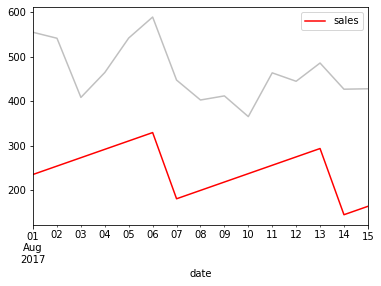

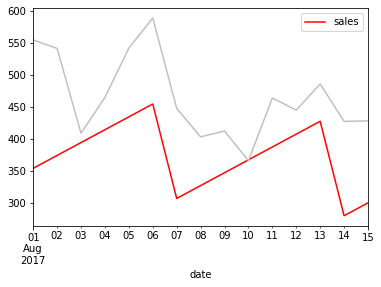

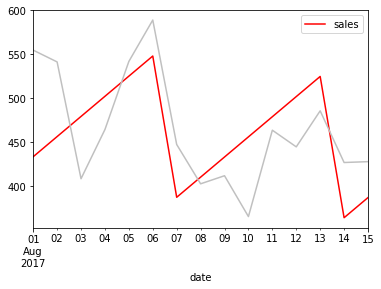

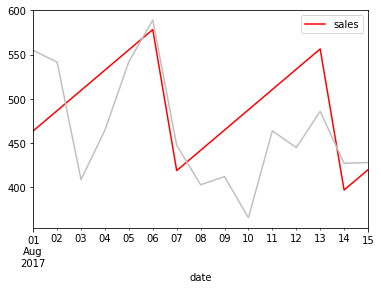

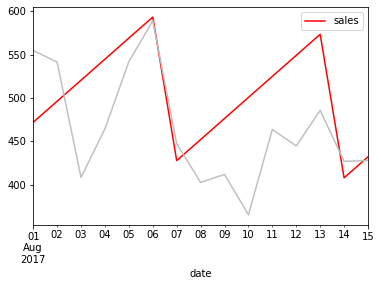

In [ ]:
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso
import jax.numpy as np
X_full = creat_time_features(av_sales)
X, y = X_y(X_full)
X_test = X_full.loc['2017-08-16':].drop(columns=['sales'])
model_cv(X,y);

## Sales and Dates with Oil Prices Code



dcoilwtico    0.011973
dtype: float64

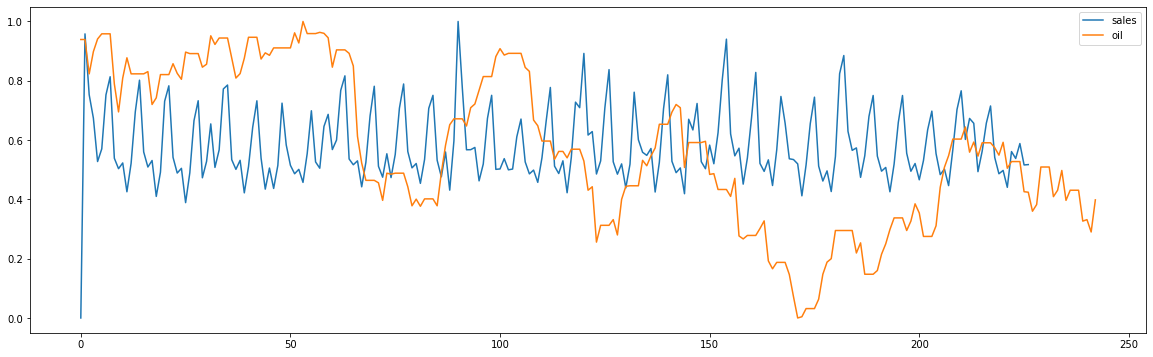

In [ ]:
oil = pd.read_csv('./oil.csv', parse_dates=['date'])
oil = oil.set_index('date').to_period('d')
oils = oil.resample('d').mean().fillna(method='ffill')
plt.figure(figsize=(20,6))
plt.plot(scale.fit_transform(sales_plot.loc['2017'].values), label='sales')
plt.plot(scale.fit_transform(oils.loc['2017'].values), label='oil')
plt.legend();
oils.loc['2017'].corrwith(sales_plot.loc['2017'].sales)

## Sales, Dates, and Oil Linear Regression with Jax

mae = 65.267
rmsle = 0.177


<Figure size 1440x1080 with 0 Axes>

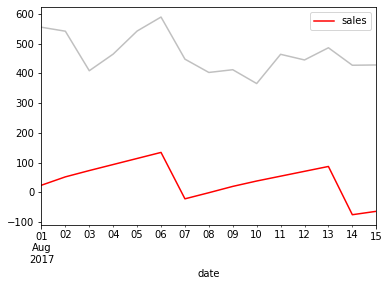

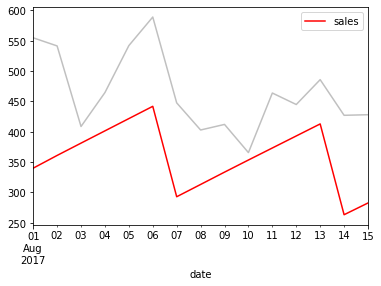

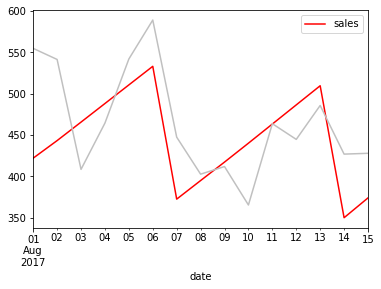

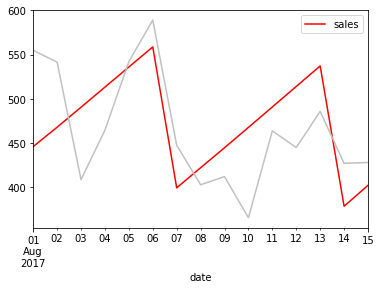

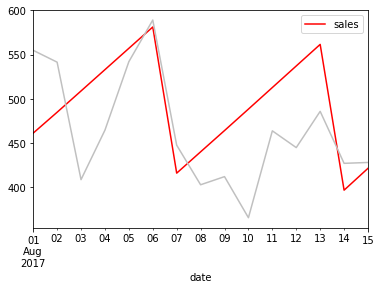

In [ ]:
X_oil = X.copy()
X_oil['oil'] = oils.loc['2016':].rolling(7).mean()
X_test['oil']= oils.loc['2017':'2017-08'].rolling(7).mean()
model_cv(X_oil,y)

In [ ]:
from jax import grad, jit
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [ ]:
# Mean Squared Error function to calculate loss
def loss(w,b,X,y):
  pred = X.dot(w)+ b
  return ((pred-y)**2).mean()

In [ ]:
Xoil = X_oil['oil'].to_numpy()
yvals = y.values

In [ ]:
#weight initialization and variables
Weights = np.zeros((Xoil.shape[0],1)) # jnp array with zero initialization
bias = 0.
l_rate = 0.001
n_iter = 3000

In [ ]:
#Gradient Function for weights and bias
gradW = jit(grad(loss, argnums=0)) #wrapped with jit function for faster processing
gradb = jit(grad(loss,argnums=1))

In [ ]:
Xoil.shape
#yvals.shape

(227,)

In [ ]:
#training loop
for _ in range(n_iter):
  dW = gradW(Weights,bias,Xoil,yvals)
  db = gradb(Weights,bias,Xoil,yvals)
  print(loss(Weights,bias,Xoil,yvals))
  Weights -= dW*l_rate
  bias-= db*l_rate

240693.1743214128
288195970000.0
3.603033e+17
4.5045194e+23
5.6315588e+29
7.04058e+35
inf
inf
inf
inf
inf
inf
inf
inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
na

In [ ]:
loss(Weights, bias, Xoil, yvals) #Model's Loss on test set

DeviceArray(nan, dtype=float32)

# Gradient Descent Code

In [ ]:
!pip -q install jax jaxlib

%env JAX_ENABLE_X64=1
%env JAX_PLATFORM_NAME=cpu

import jax.numpy as np
from jax import grad, jit

env: JAX_ENABLE_X64=1
env: JAX_PLATFORM_NAME=cpu


In [ ]:
def J(X, w, b, y):
    """Cost function for a linear regression. A forward pass of our model.

    Args:
        X: a features matrix.
        w: weights (a column vector).
        b: a bias.
        y: a target vector.

    Returns:
        scalar: a cost of this solution.    
    """
    y_hat = X.dot(w) + b # Predict values.
    return ((y_hat - y)**2).mean() # Return cost.

In [ ]:
# A features matrix.
X = Xoil

# A target column vector.
y = yvals

learning_rate = 0.01

In [ ]:
w = np.zeros((X.shape))
b = 0

In [ ]:
%timeit grad(J, argnums=2)(X, w, b, y)

TypeError: ignored

In [ ]:
w = np.zeros(X.shape)
b = 0.

In [ ]:
grad_X = jit(grad(J, argnums=1))
grad_b = jit(grad(J, argnums=2))

# Run once to trigger JIT compilation.
grad_X(X, w, b, y)
grad_b(X, w, b, y)

In [ ]:
%timeit grad_X(X, w, b, y)

In [ ]:
%timeit grad_b(X, w, b, y)

In [ ]:
for i in range(100):
    w -= learning_rate * grad_X(X, w, b, y)
    b -= learning_rate * grad_b(X, w, b, y)
    
    if i % 10 == 0:
        print(J(X, w, b, y))